# Credit EDA Assignment

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter.

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

By conducting univariate, bi-variate and multivariate analysis on given data set, patterns and relationships between variables will be established 


In [1]:
#importing the necessary libraries for the analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Reading the application data and check the data shape
app_df=pd.read_csv('application_data.csv')
app_df.shape

(307511, 122)

In [3]:
# take a look at the top 10 rows 
app_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
#checking for  null values percentage in the columns 
null_columns=(app_df.isnull().sum()/len(app_df)*100).sort_values(ascending=False)
null_columns

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

## Fixing Columns
### As there are columns with very high percentage of null values, and imputing these columns is not  practical, dropping these columns.

In [6]:
# Dropping the columns with more than 25 percent null values
null_columns=null_columns[null_columns>25]
app_df.drop(null_columns.index, axis='columns',inplace=True)

In [7]:
# check out the data types of columns after dropping column with high null values using 'info' method
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Considering only the appropriate columns and leaving other columns, like weather the client provided document(FLAG_DOCUMENT), DAYS_LAST_PHONE_CHANGE etc.

In [8]:
# take columns that are useful for analysis
app_df=app_df.loc[:,['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
               'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED',
                'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE',
                'EXT_SOURCE_2']]

In [9]:
#checking for null values
app_df.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
REGION_RATING_CLIENT             0
REGION_RATING_CLIENT_W_CITY      0
REG_CITY_NOT_LIVE_CITY           0
REG_CITY_NOT_WORK_CITY           0
LIVE_CITY_NOT_WORK_CITY          0
ORGANIZATION_TYPE                0
EXT_SOURCE_2                   660
dtype: int64

## Fixing Rows
### Dropping rows with null values as they are very negligible percentage and wont affect analysis

In [10]:
#dropping the rows with null values as these are very few and wont affect the analysis

app_df.drop(app_df.loc[app_df.AMT_ANNUITY.isnull()].index,axis='rows',inplace=True)
app_df.drop(app_df.loc[app_df.AMT_GOODS_PRICE.isnull()].index,axis='rows',inplace=True)
app_df.drop(app_df.loc[app_df.EXT_SOURCE_2.isnull()].index,axis='rows',inplace=True)


In [11]:
app_df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
EXT_SOURCE_2                   0
dtype: int64

### Fixing formatting errors in columns
#### We can observe that DAYS_BIRTH which is nothing but Age in days, DAYS_EMPLOYED which nothing but job experience in days  values have negative sign and are in days.

#### Creating a new columns, AGE_YEARS,JOB_YEARS.

In [12]:
#Creating AGE_YEARS column by dividing DAYS_BIRTH column with 365 and taking abs value
app_df['AGE_YEARS']=app_df.DAYS_BIRTH.apply(lambda x:round(abs(x/365),1))

#dropping DAYS_BIRTH column
app_df.drop(['DAYS_BIRTH'],axis='columns',inplace=True)

#Creating JOB_YEARS column by dividing DAYS_EMPLOYED column with 365 and taking abs value
app_df['JOB_YEARS']=app_df.DAYS_EMPLOYED.apply(lambda x:round(abs(x/365),1))

#dropping DAYS_EMPLOYED columns
app_df.drop('DAYS_EMPLOYED',axis='columns',inplace=True)



### Checking for outliers and handling them

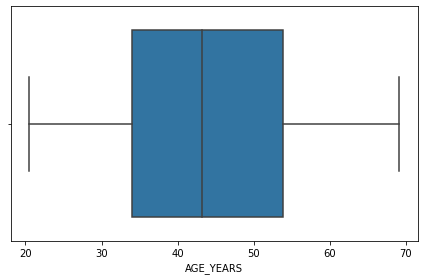

In [13]:
#Checking AGE_YEARS column for outliers or extreme values
sns.boxplot(x=app_df.AGE_YEARS)
plt.tight_layout()
plt.show()

Above boxplot shows, there are no outliers in AGE_YEARS column

### Creating bins for Ages of the clients

In [14]:
# creating bins for AGE_YEARS columns to create a categorical variable
ranges=[0,20,30,40,50,60,100]
labels=['0-20','20-30','30-40','40-50','50-60','60 and above']

app_df['AGE_GRP']=pd.cut(app_df.AGE_YEARS,bins=ranges,labels=labels)

In [15]:
# doing a describe method on JOB_YEARS Column
app_df.JOB_YEARS.describe()

count    306562.000000
mean        185.534815
std         382.033773
min           0.000000
25%           2.600000
50%           6.100000
75%          15.600000
max        1000.700000
Name: JOB_YEARS, dtype: float64

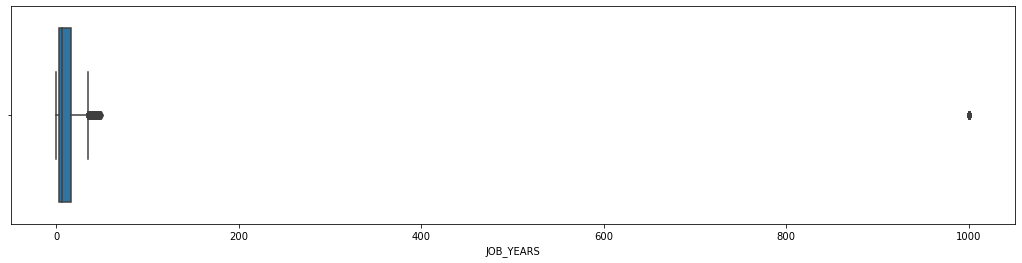

In [16]:
#creating boxplot for job experience years
plt.figure(figsize=(18,4))
sns.boxplot(x=app_df.JOB_YEARS)
plt.show()

In [17]:
# taking quantiles 
app_df.JOB_YEARS.quantile([0.5,0.75,0.81,0.82,0.83,0.84,0.85,0.9,0.95,0.99])

0.50       6.1
0.75      15.6
0.81      29.9
0.82    1000.7
0.83    1000.7
0.84    1000.7
0.85    1000.7
0.90    1000.7
0.95    1000.7
0.99    1000.7
Name: JOB_YEARS, dtype: float64

In [18]:
# there is an arbitary value 1000.7, which can not be valid experience, in the JOB_YEARS column.
# replacing it with median value of 6.1 years as the median value better representative experience of the applicants.
app_df.JOB_YEARS.replace(1000.7,6.1,inplace=True)

In [19]:
#again doing describe method on JOB_YEARS
app_df.JOB_YEARS.describe()

count    306562.000000
mean          6.455424
std           5.804471
min           0.000000
25%           2.600000
50%           6.100000
75%           7.600000
max          49.100000
Name: JOB_YEARS, dtype: float64

### creating bins for Job experience of the clients

In [20]:
#creating bins for Job experience
ranges=[0,5,10,15,20,25,30,50]
labels=['0-5','5-10','10-15','15-20','20-25','25-30','30 and above']

app_df['JOB_EXP_GRP']=pd.cut(app_df.JOB_YEARS,bins=ranges,labels=labels)

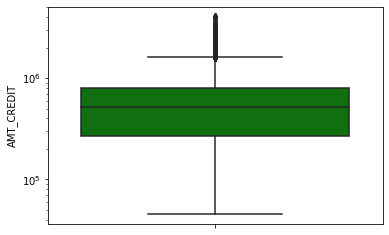

In [21]:
# Creating box plot for credit amount
sns.boxplot(data=app_df,y='AMT_CREDIT',color='Green')
plt.yscale('log')

In [22]:
# doing a describe method on AMT_CREDIT
app_df.AMT_CREDIT.describe()

count    3.065620e+05
mean     5.995983e+05
std      4.026484e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.147775e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

### Creating bins for the credit amount of the clients

In [23]:
# Creating bins for AMT_CREDIT which is the credit amount

ranges=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,5000000]
labels=['0-100000','100000-200000', '200000-300000', '300000-400000', '400000-500000','500000-600000',
          '600000-700000','700000-800000','800000-900000','900000-1000000','1000000 and above']

app_df['AMT_CREDIT_RANGE']=pd.cut(app_df['AMT_CREDIT'],bins=ranges,labels=labels)

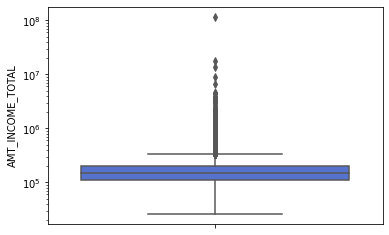

In [24]:
# Creating box plot for income
sns.boxplot(data=app_df,y='AMT_INCOME_TOTAL',color='RoyalBlue')
plt.yscale('log')

In [25]:
#doing a describe method on AMT_INCOME_TOTAL 
app_df.AMT_INCOME_TOTAL.describe()

count    3.065620e+05
mean     1.688826e+05
std      2.374456e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

### Creating bins for total income of each applicant

In [26]:
# Creating bins for AMT_INCOME_TOTAL which is total income of each applicant 
ranges=[25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
labels=['25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
           '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
            '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

app_df['AMT_INCOME_RANGE']=pd.cut(app_df['AMT_INCOME_TOTAL'],bins=ranges,labels=labels)

In [27]:
app_df.shape

(306562, 28)

In [28]:
# using pabdas describe method on CODE_GENDER to find any arbitary or missing values in gender column
app_df.CODE_GENDER.value_counts()

F      201750
M      104808
XNA         4
Name: CODE_GENDER, dtype: int64

In [29]:
#dropping row with XNA value in Gender as these are very few and wont affect analysis.
app_df=app_df[app_df.CODE_GENDER!='XNA']

In [30]:
# checking organization type column to check for any missing values
app_df.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.221107
XNA                       0.180054
Self-employed             0.124831
Other                     0.054280
Medicine                  0.036394
Business Entity Type 2    0.034339
Government                0.033811
School                    0.028918
Trade: type 7             0.025489
Kindergarten              0.022394
Construction              0.021865
Business Entity Type 1    0.019465
Transport: type 4         0.017566
Trade: type 3             0.011326
Industry: type 9          0.010967
Industry: type 3          0.010654
Security                  0.010553
Housing                   0.009626
Industry: type 11         0.008807
Military                  0.008563
Bank                      0.008158
Agriculture               0.007976
Police                    0.007601
Transport: type 2         0.007183
Postal                    0.007007
Security Ministries       0.006420
Trade: type 2             0.006152
Restaurant                0.005894
Services            

In [31]:
#We can observe that , there are 18 percentage of values with 'XNA' values, which might make sense to group them as a seperate  category 
#consider them as Missing category
app_df.ORGANIZATION_TYPE.replace('XNA','Missing',inplace=True)

In [32]:
app_df.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.221107
Missing                   0.180054
Self-employed             0.124831
Other                     0.054280
Medicine                  0.036394
Business Entity Type 2    0.034339
Government                0.033811
School                    0.028918
Trade: type 7             0.025489
Kindergarten              0.022394
Construction              0.021865
Business Entity Type 1    0.019465
Transport: type 4         0.017566
Trade: type 3             0.011326
Industry: type 9          0.010967
Industry: type 3          0.010654
Security                  0.010553
Housing                   0.009626
Industry: type 11         0.008807
Military                  0.008563
Bank                      0.008158
Agriculture               0.007976
Police                    0.007601
Transport: type 2         0.007183
Postal                    0.007007
Security Ministries       0.006420
Trade: type 2             0.006152
Restaurant                0.005894
Services            

In [33]:
# checking the credit rating of clients by external source 2
app_df.EXT_SOURCE_2.describe()

count    3.065580e+05
mean     5.143904e-01
std      1.910705e-01
min      8.173617e-08
25%      3.924379e-01
50%      5.659722e-01
75%      6.636269e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [34]:
#Segmenting Dataset into two based on target class
client_target1=app_df[app_df['TARGET']==1]
client_target0=app_df[app_df['TARGET']==0]

In [35]:
# Calculationg imbalance ratio for target clasee
IR=len(client_target0)/len(client_target1)
print(IR)

11.385180995475114


In [36]:
#resetting index
client_target0.reset_index(inplace=True)
client_target1.reset_index(inplace=True)


## Analysis on client with payment difficulties(TARGET=1) data segment

### Univariate analysis on Income Types categorical variable.

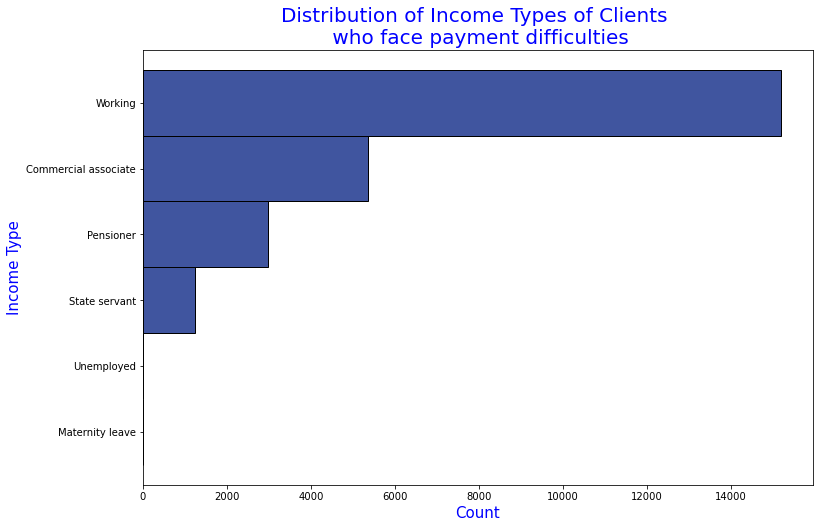

In [37]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn-dark-palette')
sns.histplot(data=client_target1, y='NAME_INCOME_TYPE')
plt.title("Distribution of Income Types of Clients \n who face payment difficulties", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Count", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
plt.ylabel("Income Type", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
plt.show()

Above Distribution indicates, those clients whose income type is working face higher diffulties in payment among other income types.

### univariate analysis on clients who own real estate property vs who doesnt own real estate.

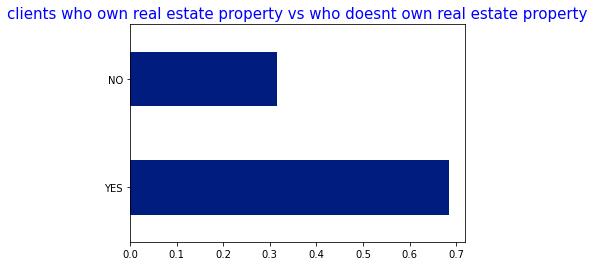

In [38]:
# creating bar plot

client_target1.FLAG_OWN_REALTY.value_counts(normalize=True).plot.barh()
plt.title("clients who own real estate property vs who doesnt own real estate property", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'blue'})
plt.yticks((0,1),['YES','NO'])
plt.show()

Above bar chart clearly indicates clients who own real estate property are most prone to payment difficulties compared to who doesnt own a real estate property.

### Analysis of Distribution of Income ranges for clients who face payment difficulties

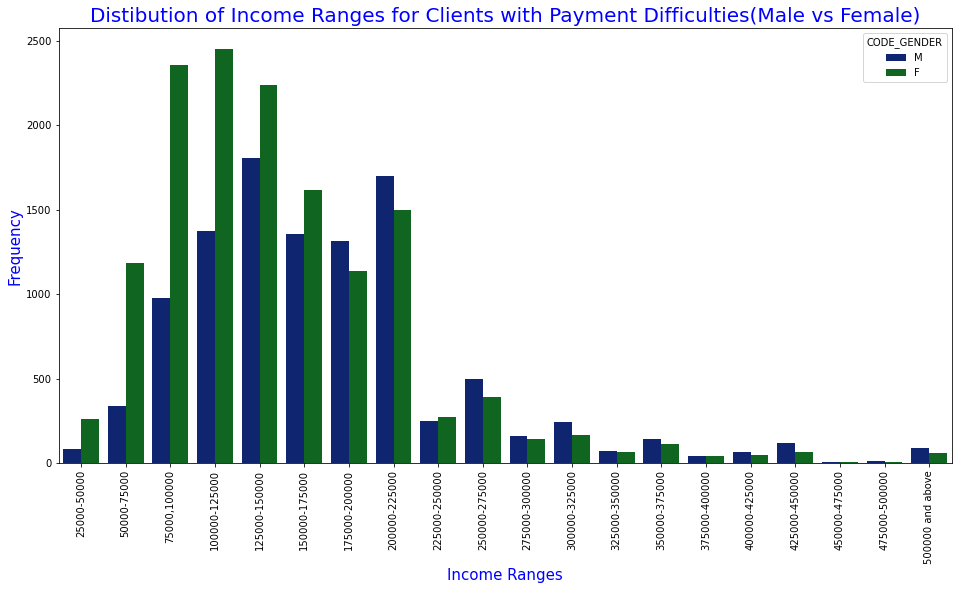

In [39]:
# creating histogram for income ranges of client
plt.figure(figsize=(16,8))
plt.style.use('seaborn-dark-palette')
sns.countplot(data=client_target1, x='AMT_INCOME_RANGE',hue='CODE_GENDER')
plt.title("Distibution of Income Ranges for Clients with Payment Difficulties(Male vs Female)", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Income Ranges", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
plt.ylabel("Frequency", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
plt.xticks(rotation=90)
plt.show()

Above distribution indicates that in general clients with income ranging from 50000 to 225000 are more likey to face payment difficulties. In particular Females with income ranging from 25000 to 175000 are more likely to face payment difficulties compared to Males.
For income ranges above 175000, Male clients are more likely to face payment difficulties than Female clients.

### Analysis of Credit ranges of Clients facing payment difficulties(MALE vs FEMALE)

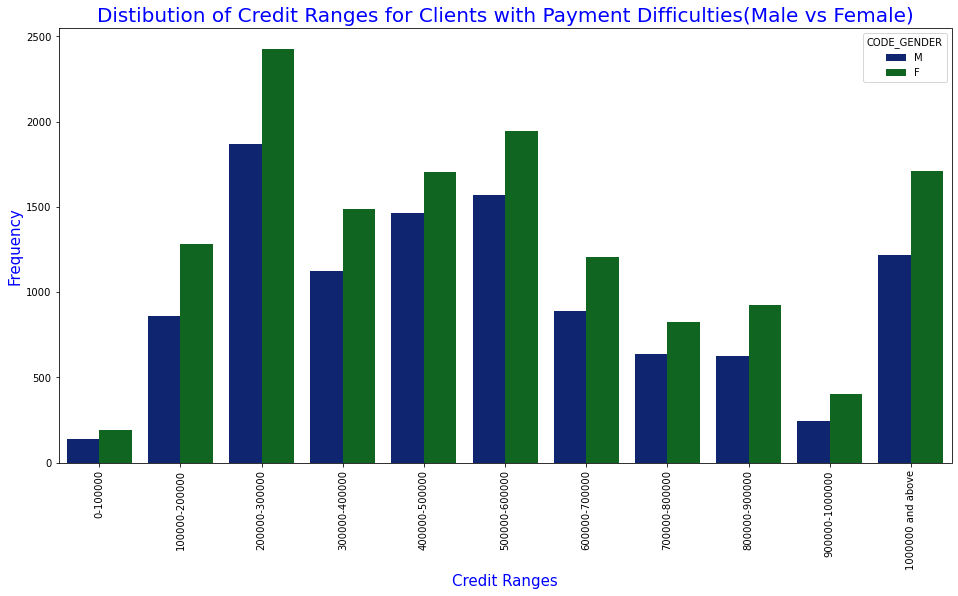

In [40]:
plt.figure(figsize=(16,8))
plt.style.use('seaborn-dark-palette')
sns.countplot(data=client_target1, x='AMT_CREDIT_RANGE',hue='CODE_GENDER')
plt.title("Distibution of Credit Ranges for Clients with Payment Difficulties(Male vs Female)", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Credit Ranges", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
plt.ylabel("Frequency", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
plt.xticks(rotation=90)
plt.show()

In all Credit ranges , more female clients are facing payment difficultie compared to male clients

### Analysis of Organization type for clients facing payment difficulty

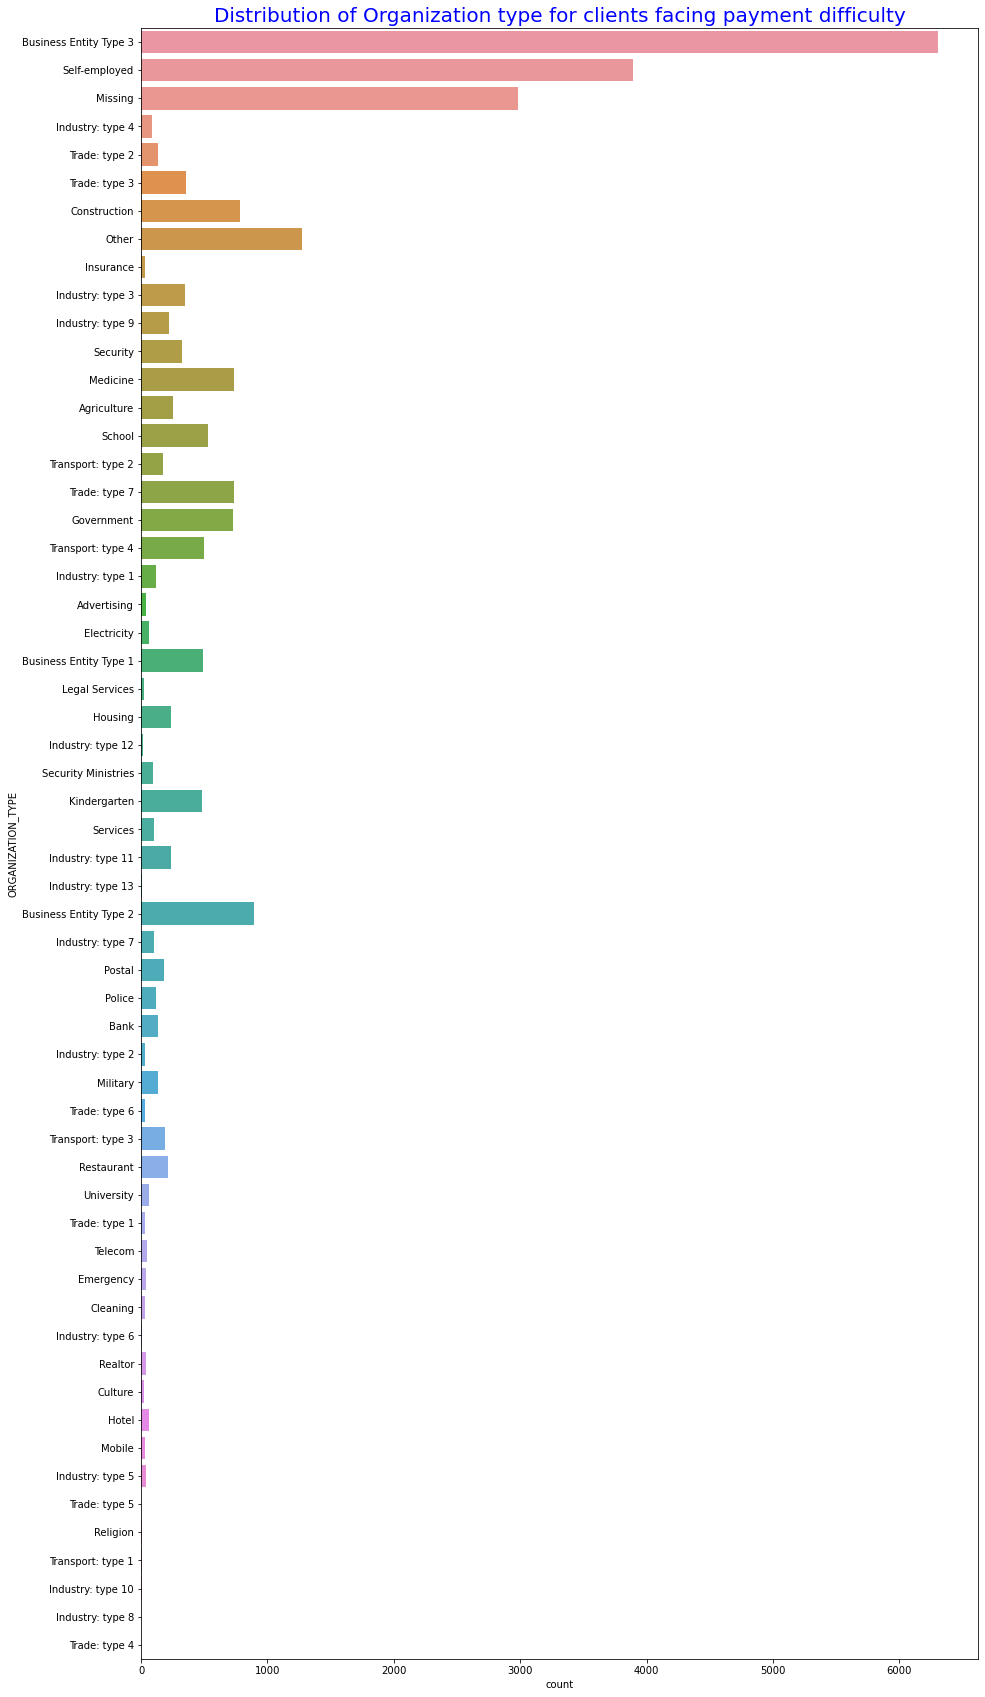

In [41]:
plt.figure(figsize=(15,30))
sns.countplot(data=client_target1,y='ORGANIZATION_TYPE')
plt.title("Distribution of Organization type for clients facing payment difficulty",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

From above countplot, it is clear that clients with business type3,self-employed and clients with missing organization type are facing payment difficulty compared to others

## Bivariate and Multivariate Analysis of clients facing payment difficulties(TARGET=1)

In [42]:
client_target1.head()

,index,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AGE_YEARS,JOB_YEARS,AGE_GRP,JOB_EXP_GRP,AMT_CREDIT_RANGE,AMT_INCOME_RANGE
0,0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,...,0,0,Business Entity Type 3,0.262949,25.9,1.7,20-30,0-5,400000-500000,200000-225000
1,26,100031,1,Cash loans,F,N,Y,112500.0,979992.0,27076.5,...,0,0,Business Entity Type 3,0.548477,51.3,7.2,50-60,5-10,900000-1000000,100000-125000
2,40,100047,1,Cash loans,M,N,Y,202500.0,1193580.0,35028.0,...,0,0,Business Entity Type 3,0.306841,47.9,3.5,40-50,0-5,1000000 and above,200000-225000
3,42,100049,1,Cash loans,F,N,N,135000.0,288873.0,16258.5,...,0,0,Self-employed,0.674203,36.7,9.9,30-40,5-10,200000-300000,125000-150000
4,81,100096,1,Cash loans,F,N,Y,81000.0,252000.0,14593.5,...,0,0,Missing,0.023952,67.9,6.1,60 and above,5-10,200000-300000,"75000,100000"


In [43]:
client_target1.columns

Index(['index', 'SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'AGE_YEARS', 'JOB_YEARS',
       'AGE_GRP', 'JOB_EXP_GRP', 'AMT_CREDIT_RANGE', 'AMT_INCOME_RANGE'],
      dtype='object')

### Bivariate analysis of Credit amount and Education Status variables

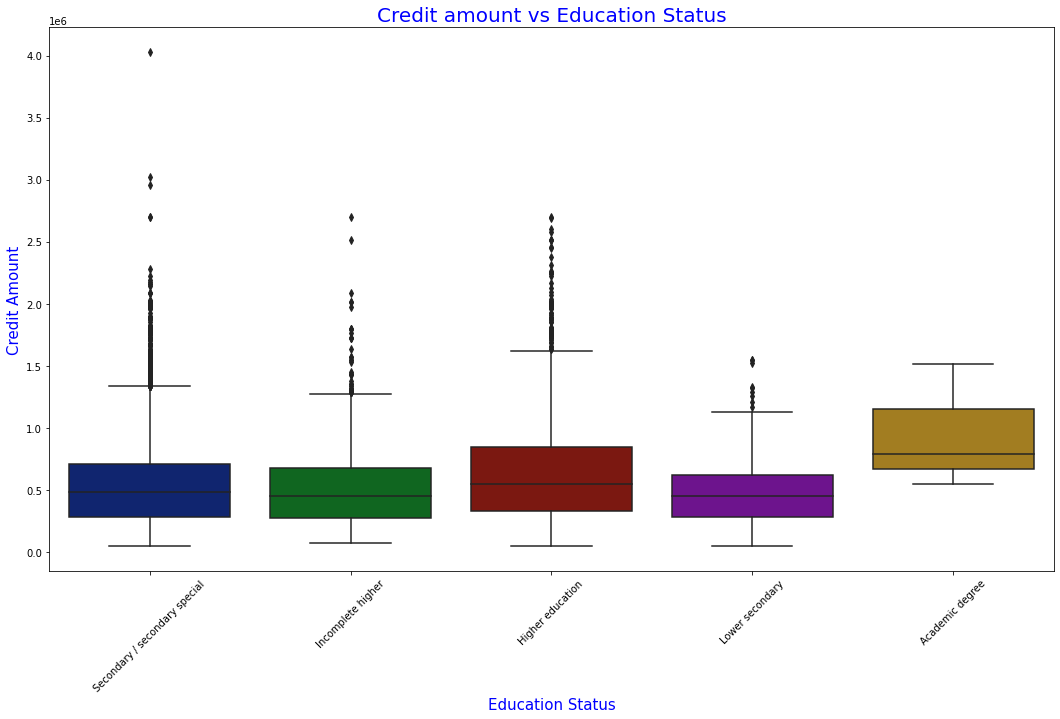

In [44]:
plt.figure(figsize=(18,10))
sns.boxplot(data =client_target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',orient='v')
plt.title('Credit amount vs Education Status',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Education Status", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
plt.ylabel("Credit Amount", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
plt.xticks(rotation=45)
plt.show()

From above Boxplot analysis,Median Credit amount is higher for clients with acadamic degree who are facing payment difficulties and there are more clients above median credit amount in this category facing payment difficulties

### Bivariate analysis for Credit amount vs Income Type

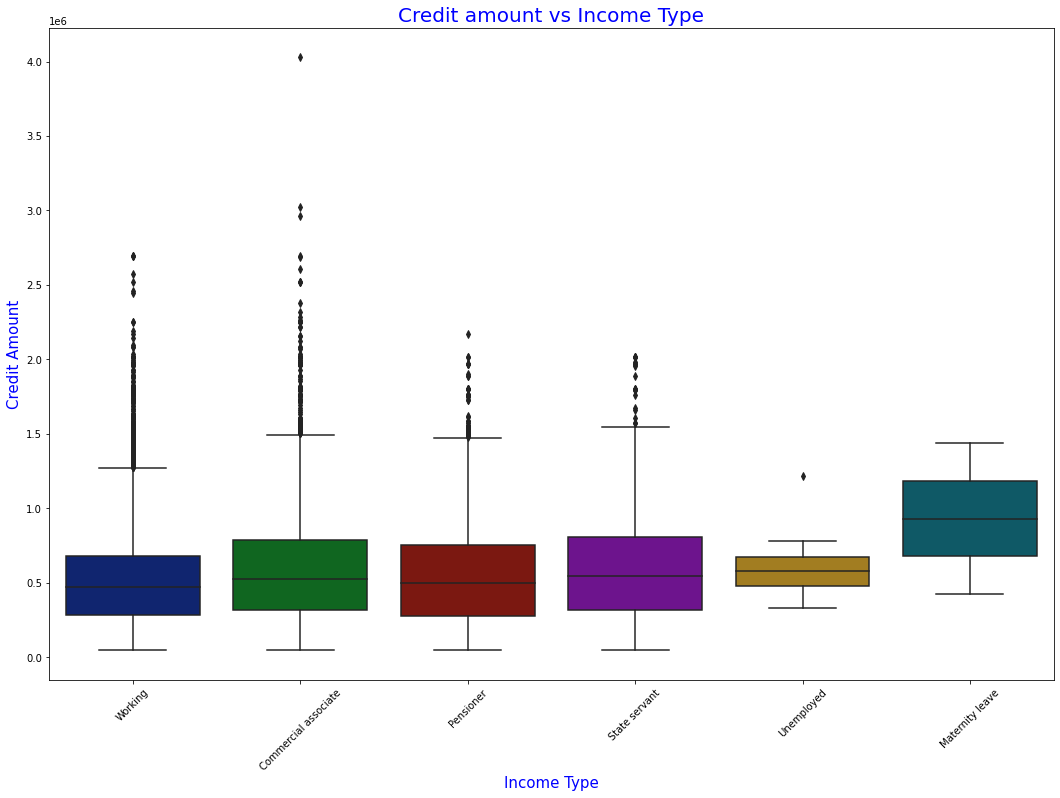

In [45]:
plt.figure(figsize=(18,12))
sns.boxplot(data =client_target1, x='NAME_INCOME_TYPE',y='AMT_CREDIT',orient='v')
plt.title('Credit amount vs Income Type',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Income Type", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
plt.ylabel("Credit Amount", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
plt.xticks(rotation=45)
plt.show()

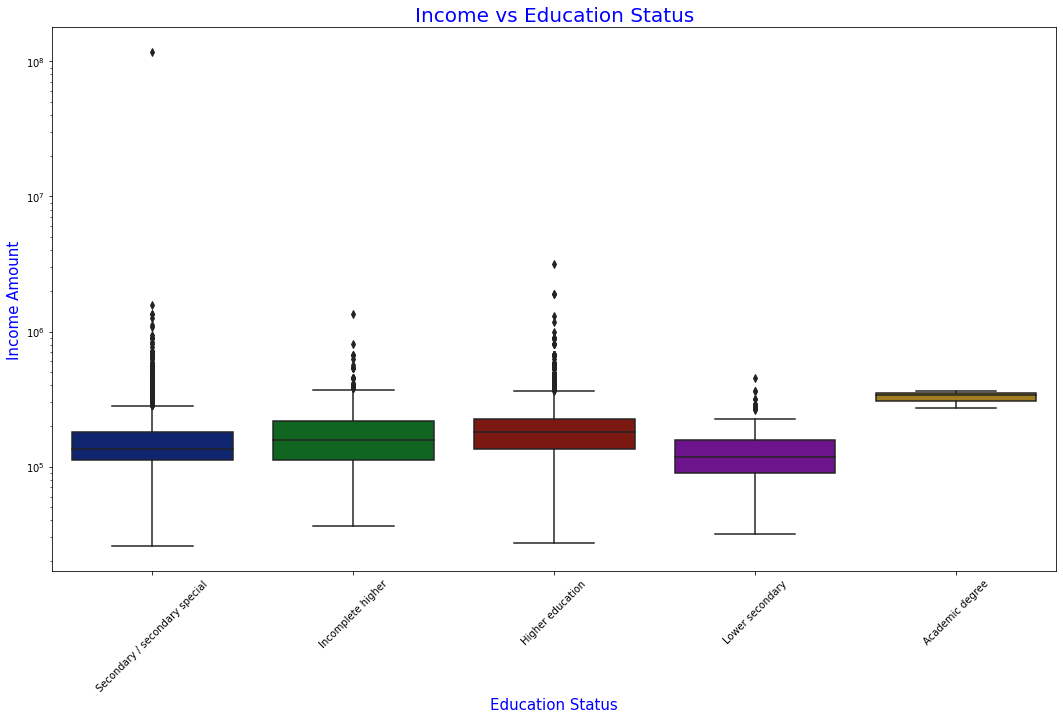

In [46]:
# boxplot for income amount for various education status
plt.figure(figsize=(18,10))
sns.boxplot(data =client_target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',orient='v')
plt.title('Income vs Education Status',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Education Status", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
plt.ylabel("Income Amount", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

Clients with lower secondary education have low median incomes compared to other category education wise, Academaic degree holders have higher median incomes among all categories.

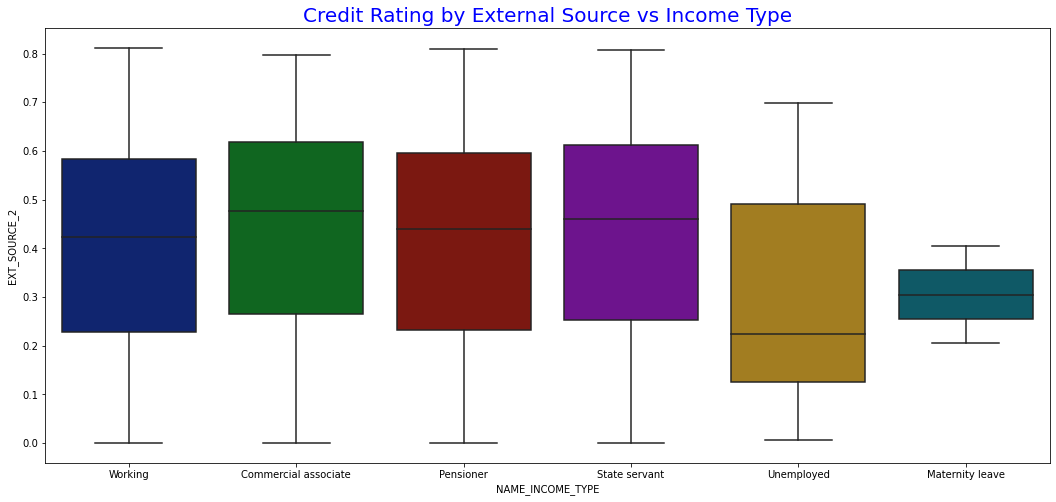

In [47]:
#box plot for credit rating vs income type
plt.figure(figsize=(18,8))
sns.boxplot(data =client_target1, x='NAME_INCOME_TYPE',y='EXT_SOURCE_2',orient='v')
plt.title('Credit Rating by External Source vs Income Type',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

Among the clients facing payment difficulties, Unemployed category of clients have lower median credit ratings among all other categories.

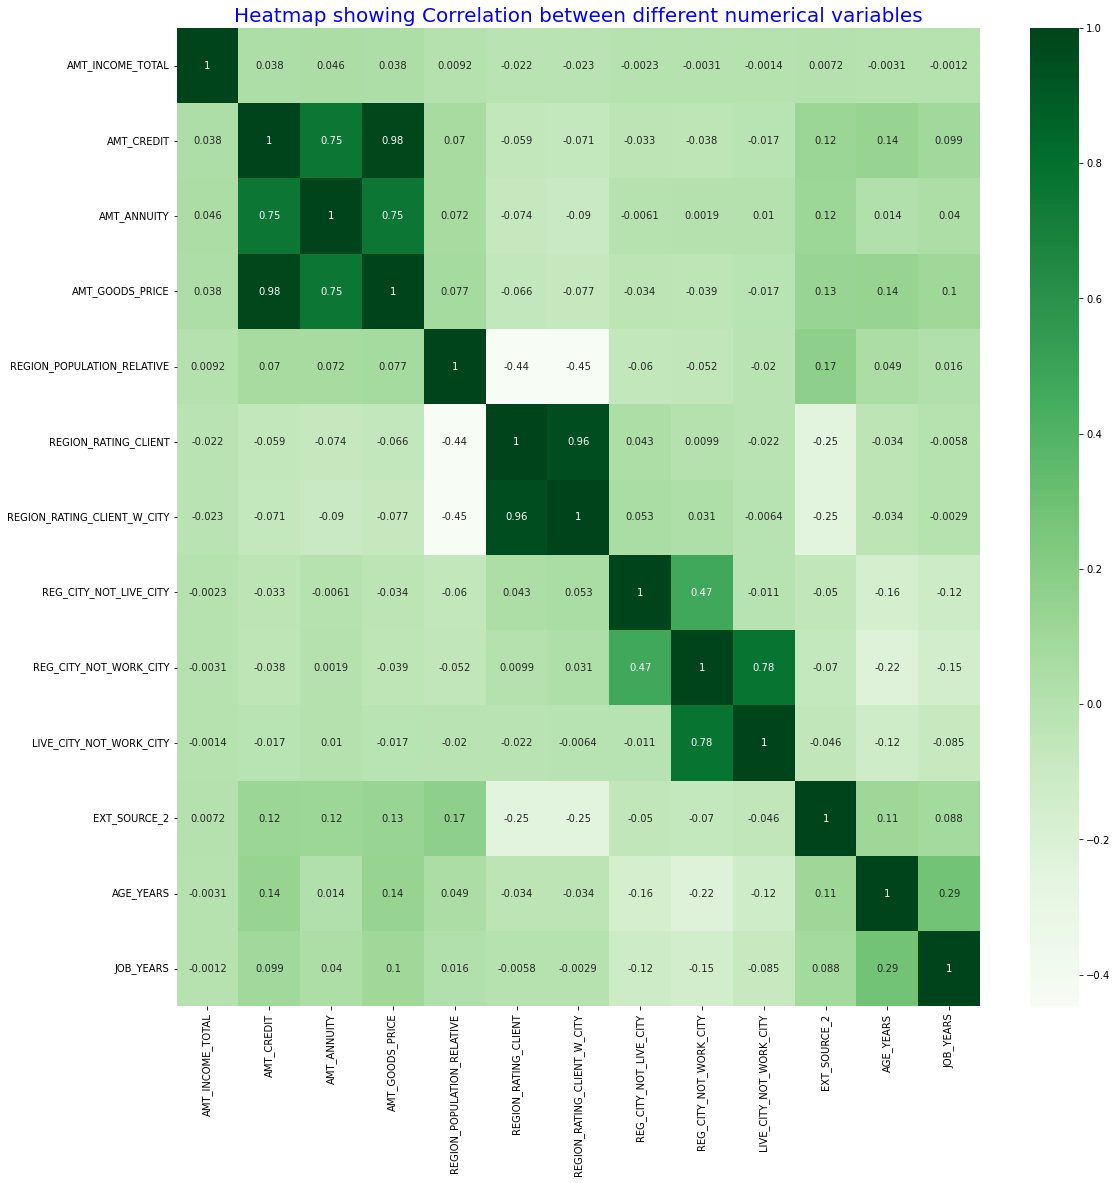

In [48]:
# heat map showing correlation between different numnerical variables for clients facing payment difficulties
plt.figure(figsize=(18,18))
sns.heatmap( client_target1.iloc[:,3:].corr(), annot=True, cmap='Greens')
plt.title('Heatmap showing Correlation between different numerical variables',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

There is strong positive correlation between annuity amount and credit amount. Also between annuity amount and Goodsprice amount, there is high positive correlation. This correlation matrix shows the top correlations between different variables.

In [49]:
client_target1.EXT_SOURCE_2.median()

0.4401462149267717

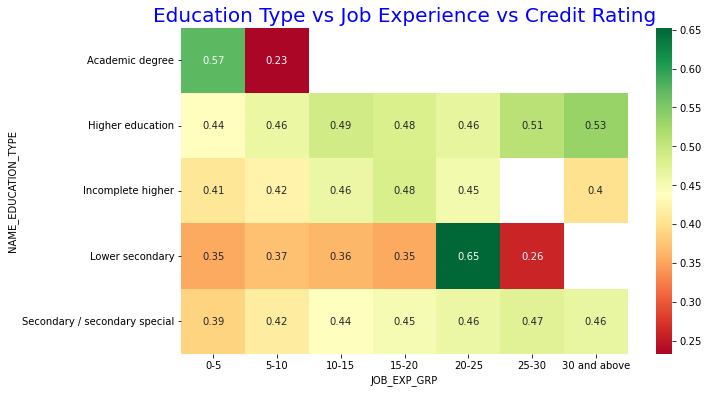

In [50]:
# creating heat map for Education type vs job experience vs credit rating of client by external source
res=pd.pivot_table(data=client_target1,index='NAME_EDUCATION_TYPE',columns='JOB_EXP_GRP',values='EXT_SOURCE_2')
plt.figure(figsize=(10,6))
sns.heatmap(res,annot=True,cmap='RdYlGn',center=0.44)
plt.title("Education Type vs Job Experience vs Credit Rating", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

Clients with lower secondary education as a group tend to have lower than median credit ratings compared to all other categories by education type

# Analysis for all other cases(TARGET=0)

### univarate anlaysis

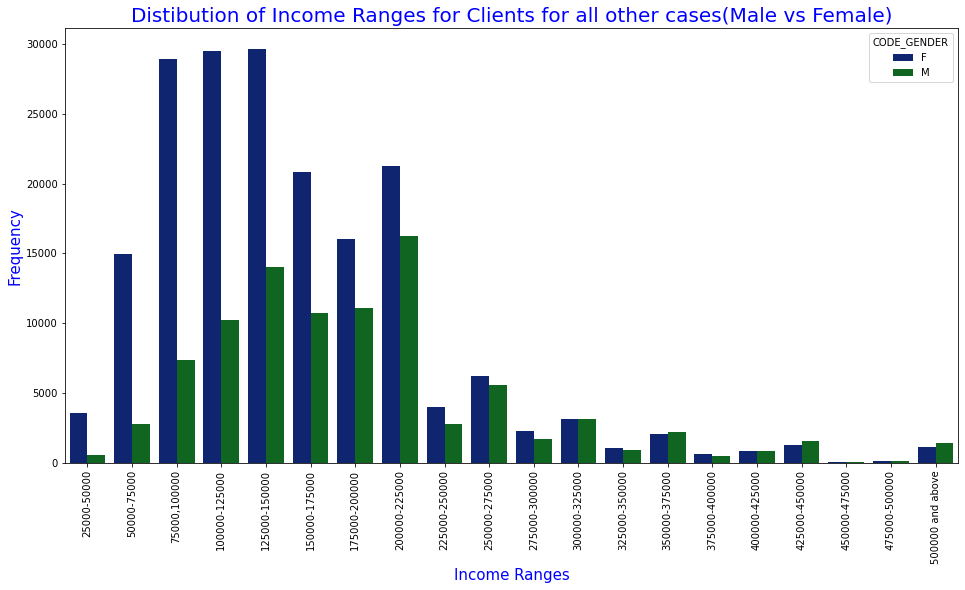

In [51]:
# creating histogram for income ranges of client
plt.figure(figsize=(16,8))
plt.style.use('seaborn-dark-palette')
sns.countplot(data=client_target0, x='AMT_INCOME_RANGE',hue='CODE_GENDER')
plt.title("Distibution of Income Ranges for Clients for all other cases(Male vs Female)", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Income Ranges", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
plt.ylabel("Frequency", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
plt.xticks(rotation=90)
plt.show()

From above distribution , it is understood that females count is significantly higer in lower income groups ranging from 25000 to 225000 who are not missing payments

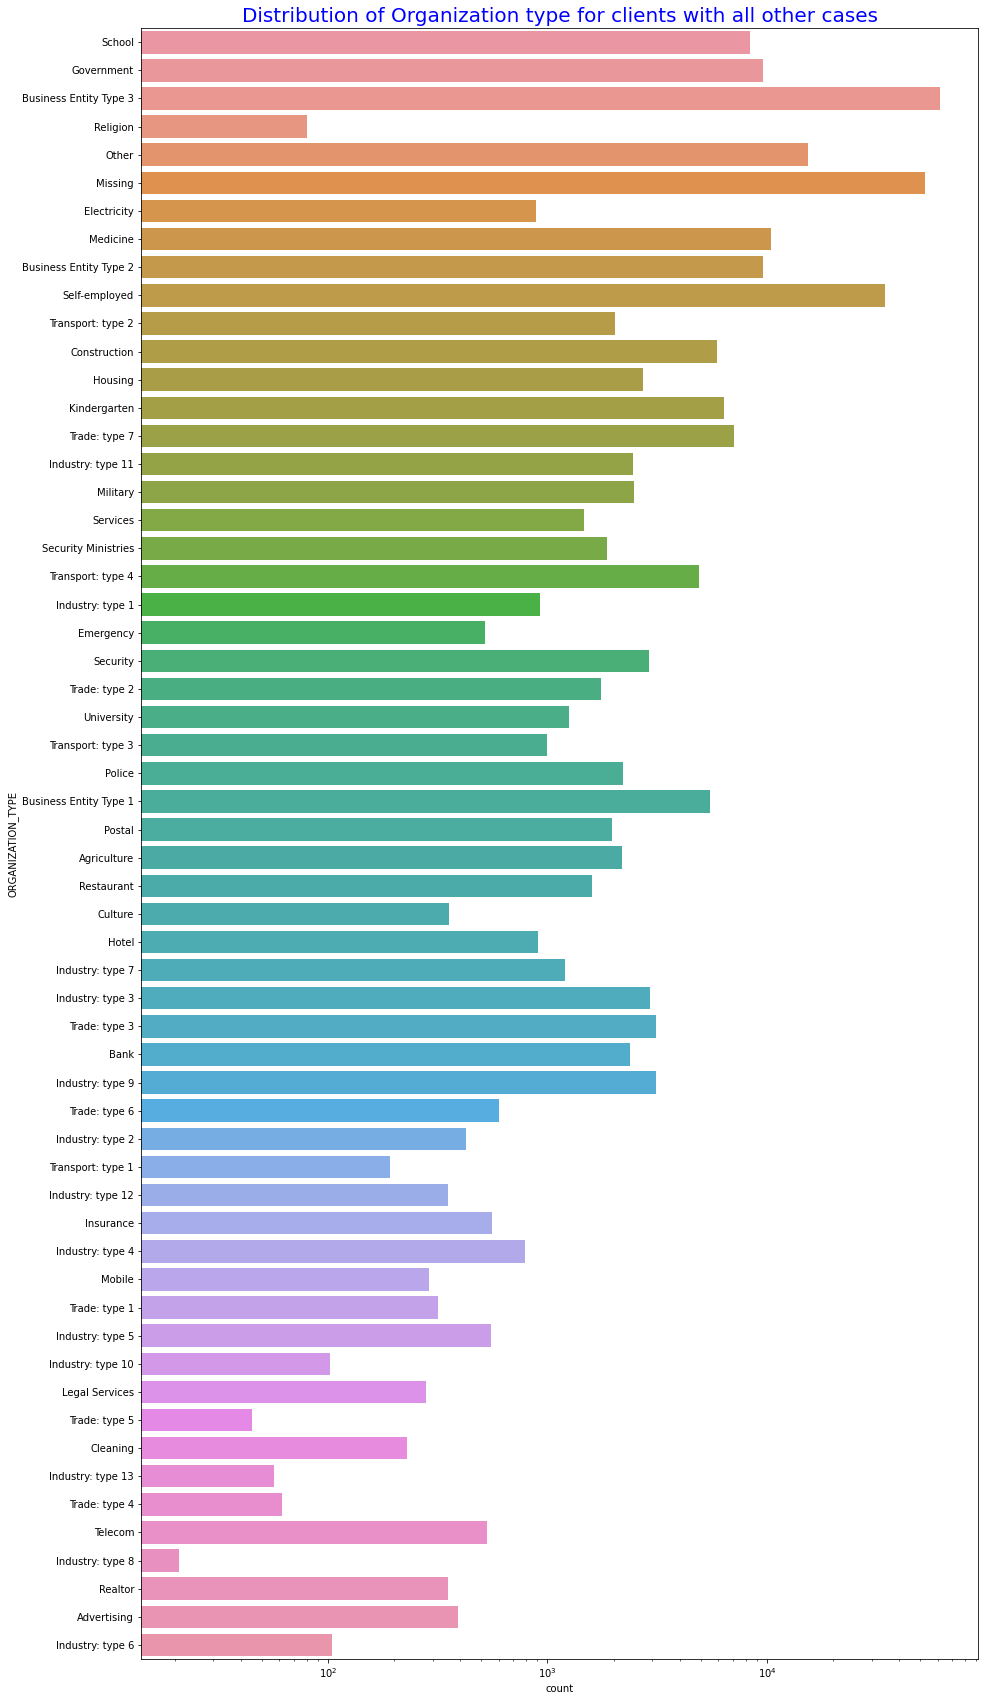

In [52]:
# distribution of Organization type for clients with all other cases
plt.figure(figsize=(15,30))
sns.countplot(data=client_target0,y='ORGANIZATION_TYPE')
plt.title("Distribution of Organization type for clients with all other cases",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.xscale('log')
plt.show()

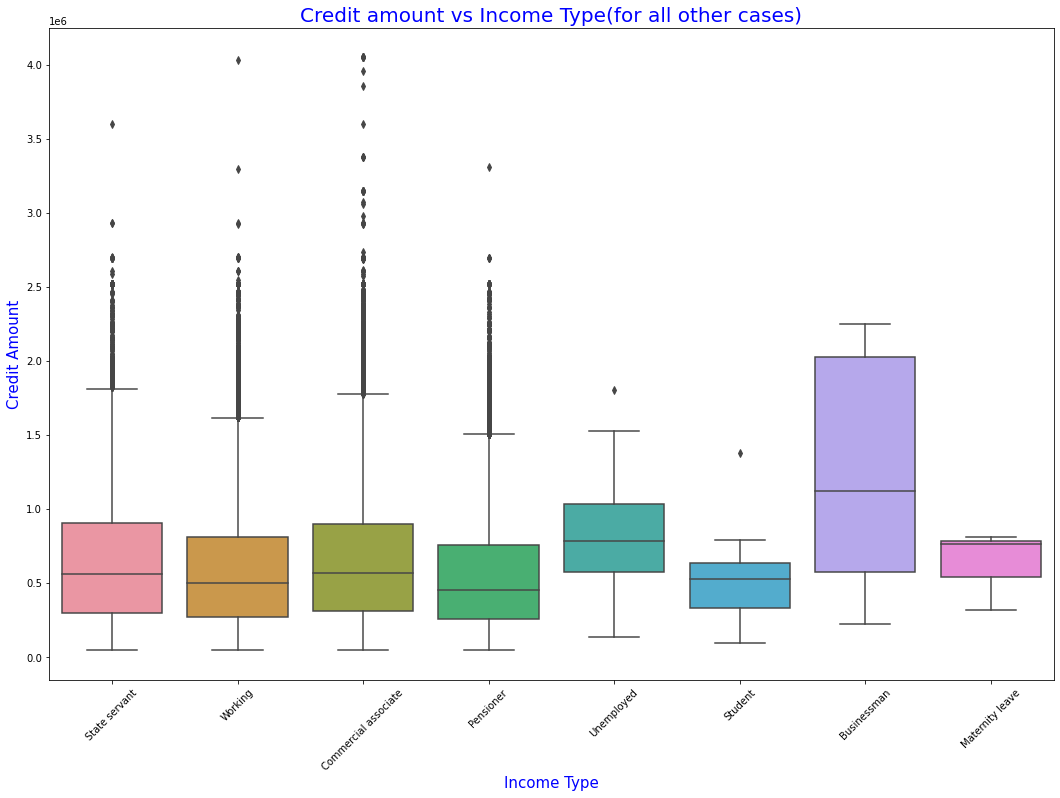

In [53]:
#distribution of credit amount for different income types
plt.figure(figsize=(18,12))
sns.boxplot(data =client_target0, x='NAME_INCOME_TYPE',y='AMT_CREDIT',orient='v')
plt.title('Credit amount vs Income Type(for all other cases)',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Income Type", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
plt.ylabel("Credit Amount", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
#plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

Businessman category has higher median credit amount with large inter quartile range compared to all other categories

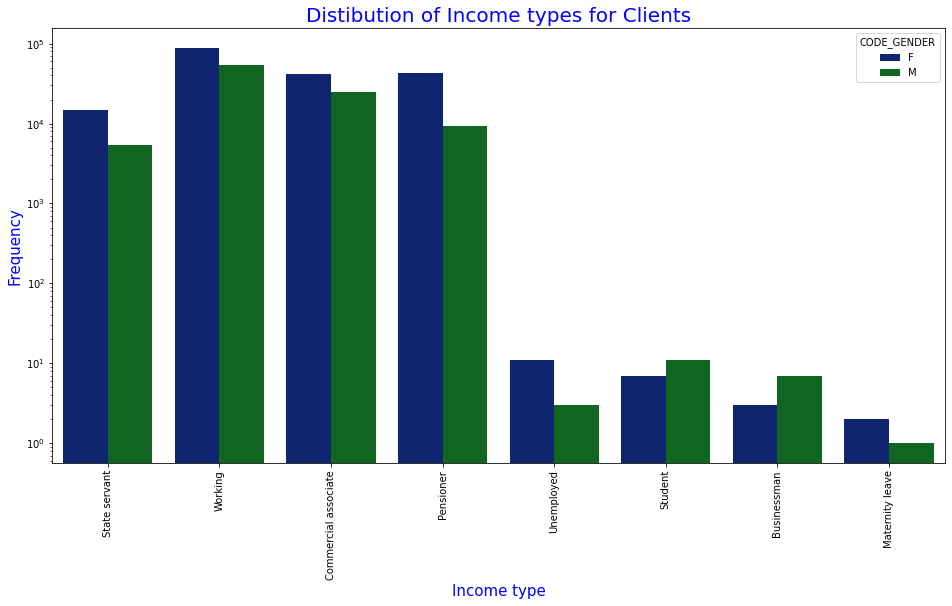

In [54]:
# creating histogram for income types of client
plt.figure(figsize=(16,8))
plt.style.use('seaborn-dark-palette')
sns.countplot(data=client_target0, x='NAME_INCOME_TYPE',hue='CODE_GENDER')
plt.title("Distibution of Income types for Clients", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Income type", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
plt.ylabel("Frequency", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

Businessman and student category of income type have alsomt negligible count of payment difficulties

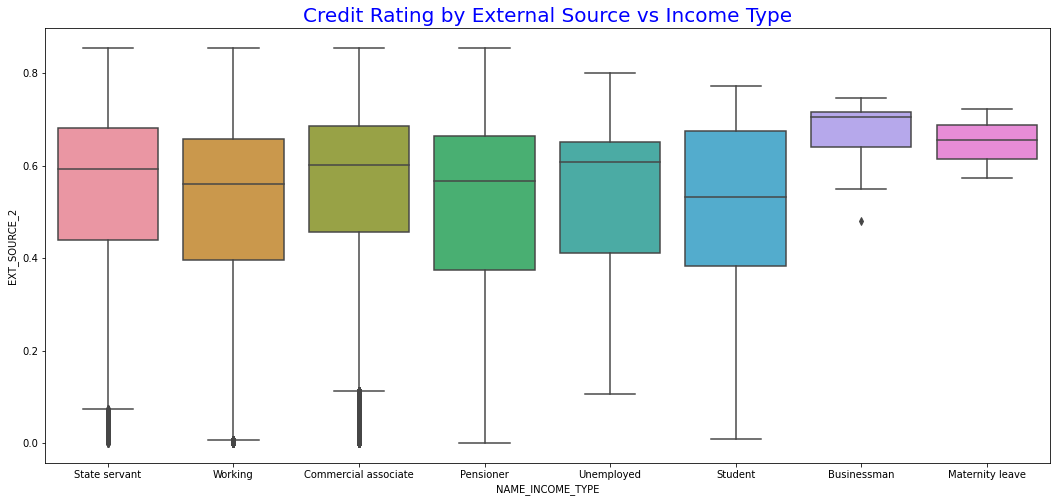

In [55]:
#box plot for credit rating vs income type
plt.figure(figsize=(18,8))
sns.boxplot(data =client_target0, x='NAME_INCOME_TYPE',y='EXT_SOURCE_2',orient='v')
plt.title('Credit Rating by External Source vs Income Type',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

Businessman category of clients has higher median credit ratings compared to other categories who are not facing any payment difficulties

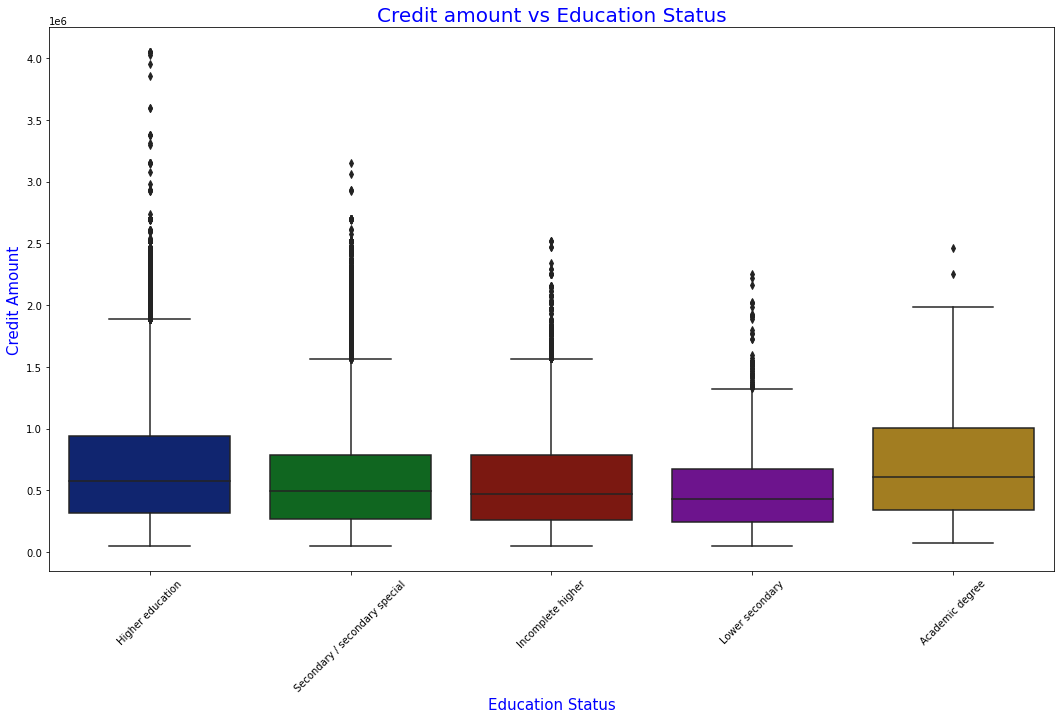

In [56]:
#box plot showing credit amount vs education status(for all other cases)
plt.figure(figsize=(18,10))
sns.boxplot(data =client_target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',orient='v')
plt.title('Credit amount vs Education Status',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Education Status", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
plt.ylabel("Credit Amount", fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Blue'})
plt.xticks(rotation=45)
plt.show()

Academic degree holders and clients with Higher education have higher median credit amount compared to other categories.


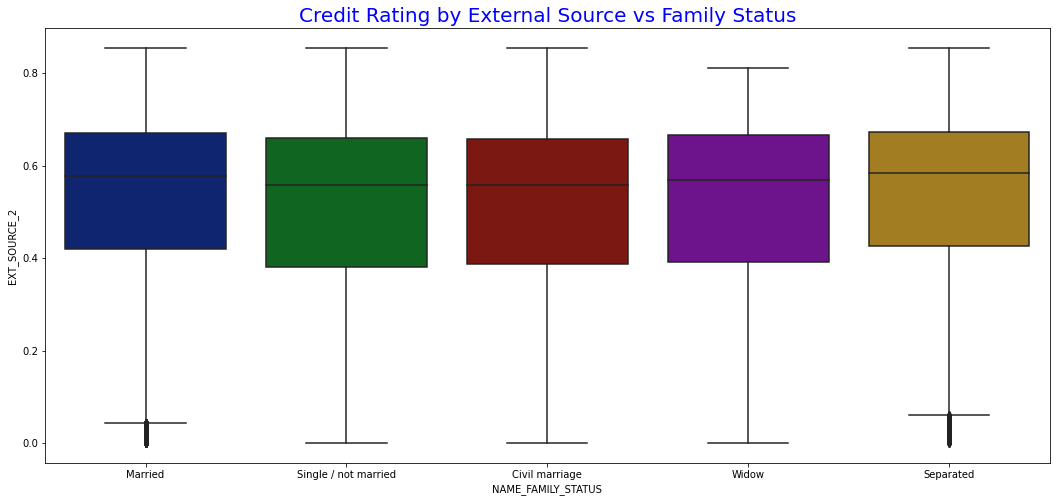

In [57]:
#box plot for credit rating vs family status
plt.figure(figsize=(18,8))
sns.boxplot(data =client_target0, x='NAME_FAMILY_STATUS',y='EXT_SOURCE_2',orient='v')
plt.title('Credit Rating by External Source vs Family Status',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

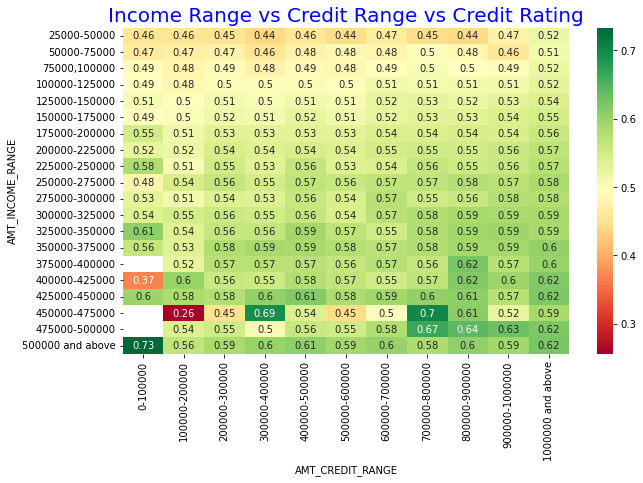

In [58]:
# creating heat map for Income Range vs Credit Range vs Credit Rating of client by external source
res=pd.pivot_table(data=client_target0,index='AMT_INCOME_RANGE',columns='AMT_CREDIT_RANGE',values='EXT_SOURCE_2')
plt.figure(figsize=(10,6))
sns.heatmap(res,annot=True,cmap='RdYlGn')
plt.title("Income Range vs Credit Range vs Credit Rating", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

clients in all credit ranges, tends to have higer credit ratings in the income ranges above 175000, among the clients who dont miss any payments

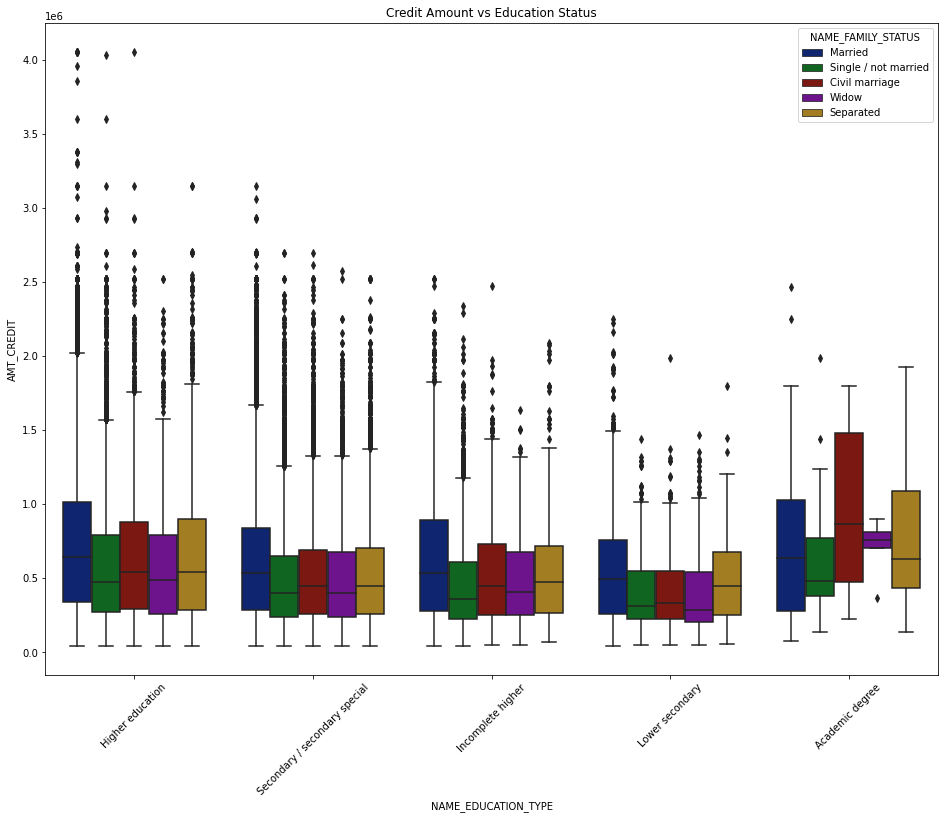

In [59]:
# Box plot of credit amounts for category of education 

plt.figure(figsize=(16,12))
sns.boxplot(data =client_target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.xticks(rotation=45)
plt.title('Credit Amount vs Education Status')
plt.show()

### Analysis of combined dataset(Target=1 and Target=0 classes)

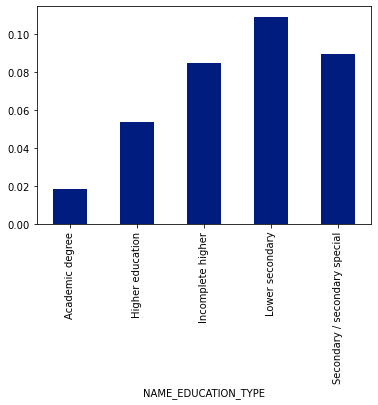

In [60]:
#creating a bar chart grouping by education type and taking mean on target variable
app_df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().plot.bar()
plt.show()

In [61]:
app_df.EXT_SOURCE_2.mean()

0.5143904280765913

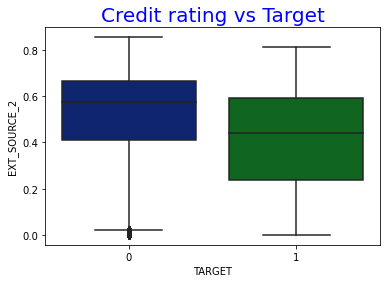

In [62]:
#box plot for credit rating by external source
sns.boxplot(data=app_df,y='EXT_SOURCE_2', x='TARGET')
plt.title("Credit rating vs Target", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

clients with lower than the median credit rating are more likely to face payment dificulties , so credit rating should be carefully considered.

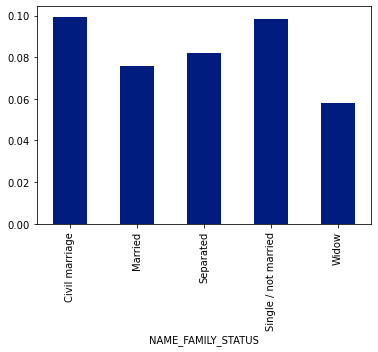

In [63]:
# grouping by family status and taking mean of target variable
app_df.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().plot.bar()
plt.show()

In [64]:
app_df.TARGET.mean()

0.08074165410786865

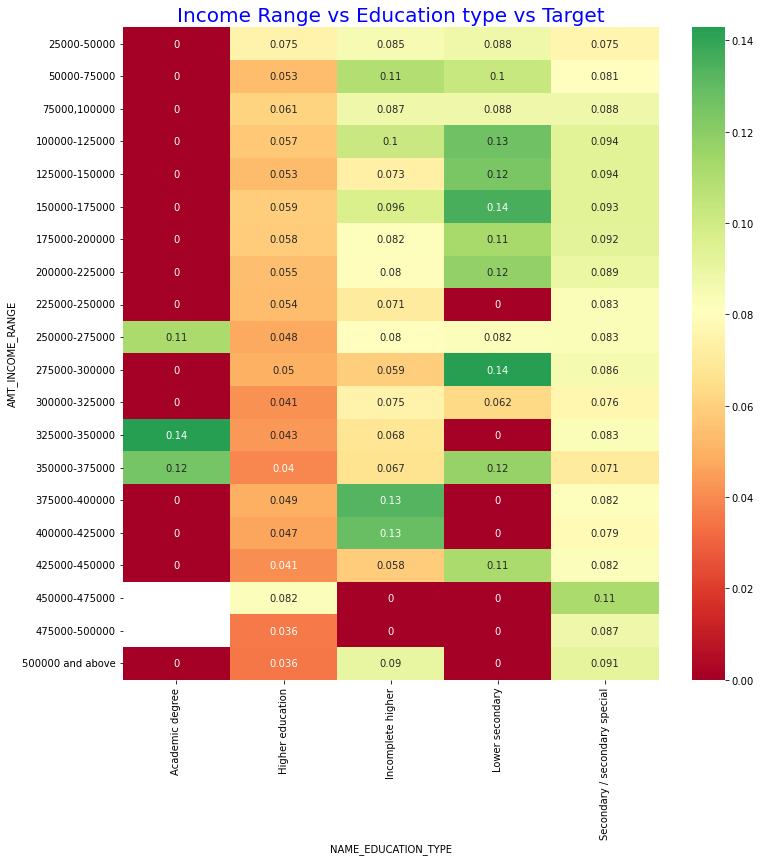

In [65]:
# creating heat map income ranges , education type with aggregation of Target variable
res=pd.pivot_table(data=app_df,index='AMT_INCOME_RANGE',columns='NAME_EDUCATION_TYPE',values='TARGET')
plt.figure(figsize=(12,12))
plt.title("Income Range vs Education type vs Target", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
sns.heatmap(res,annot=True,cmap='RdYlGn',center=0.081)
plt.show()

Above heat map shows the clients with lower secondary education as a category are more likely to miss their payments compared to other categories

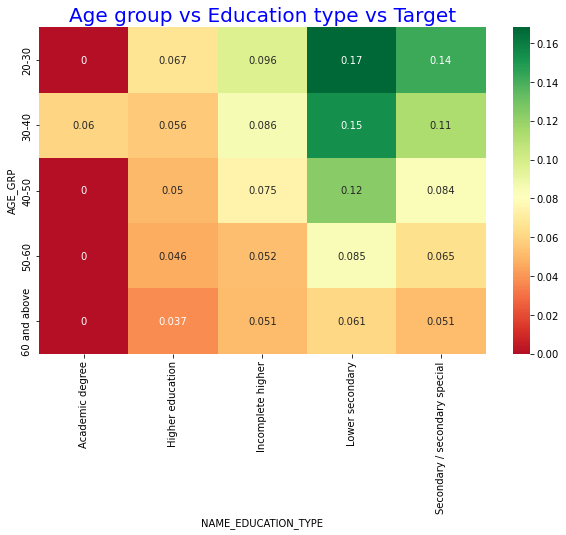

In [66]:
# creating heat map Age group , education type with aggregation of Target variable
res=pd.pivot_table(data=app_df,index='AGE_GRP',columns='NAME_EDUCATION_TYPE',values='TARGET')
plt.figure(figsize=(10,6))
sns.heatmap(res,annot=True,cmap='RdYlGn',center=0.081)
plt.title("Age group vs Education type vs Target", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

clients with lower secondary education and in age groups of 20-30 and 30-40 are more prone to payment difficulties

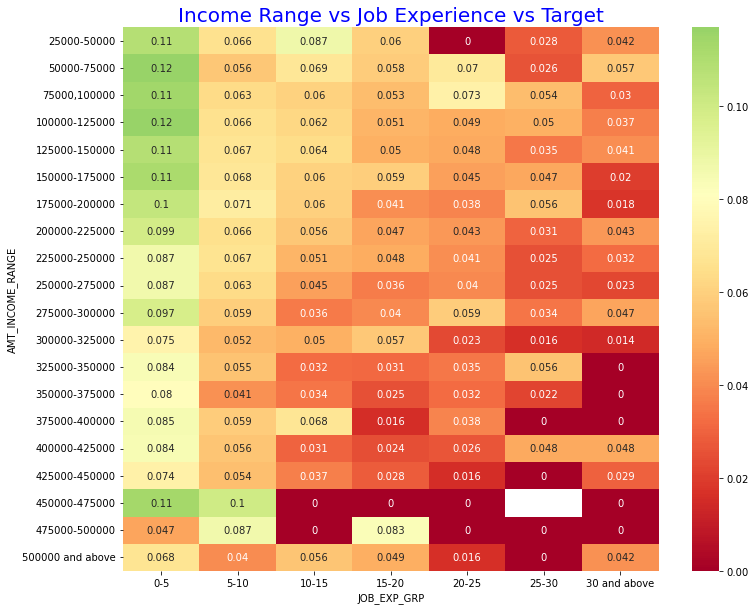

In [67]:
# creating heat map for  income ranges vs job experience vs Target variables
res=pd.pivot_table(data=app_df,index='AMT_INCOME_RANGE',columns='JOB_EXP_GRP',values='TARGET')
plt.figure(figsize=(12,10))
sns.heatmap(res,annot=True,cmap='RdYlGn',center=0.081)
plt.title("Income Range vs Job Experience vs Target", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

Clients with job experience of less than 5 years are more likely to face payment difficulties compared to clients with more than 5 years experience

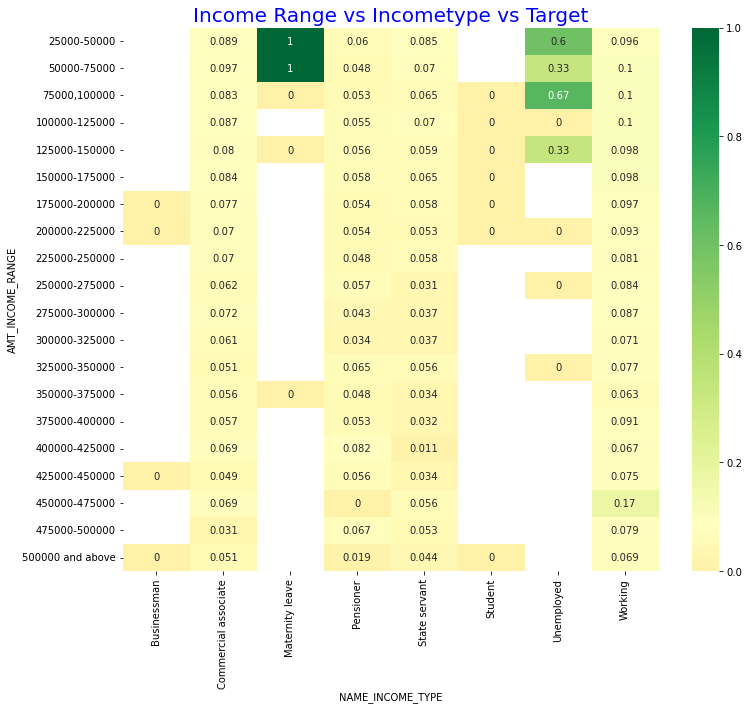

In [68]:
# creating heat map for  income ranges vs job experience vs Target variables
res=pd.pivot_table(data=app_df,index='AMT_INCOME_RANGE',columns='NAME_INCOME_TYPE',values='TARGET')
plt.figure(figsize=(12,10))
sns.heatmap(res,annot=True,cmap='RdYlGn',center=0.081)
plt.title("Income Range vs Incometype vs Target", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

Unemployed clients with lower income ranges upto 150000 are facing payment diffculties. Client with maternity leave category also facing payment difficulty.

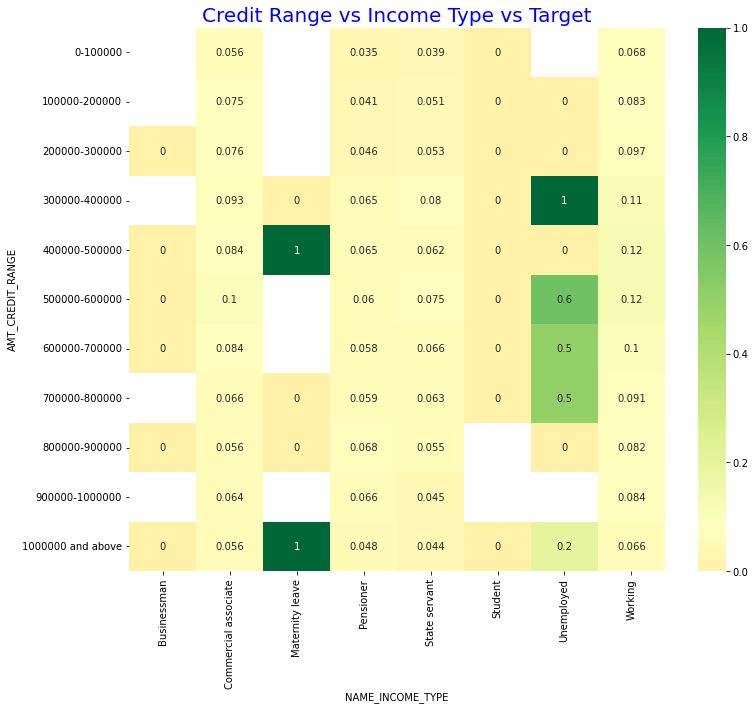

In [69]:
# creating heat map for  income ranges vs job experience vs Target variables
res=pd.pivot_table(data=app_df,index='AMT_CREDIT_RANGE',columns='NAME_INCOME_TYPE',values='TARGET')
plt.figure(figsize=(12,10))
sns.heatmap(res,annot=True,cmap='RdYlGn',center=0.081)
plt.title("Credit Range vs Income Type vs Target", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

Unemployed clients in higher credit ranges of 300000 to 800000 as a category are facing payemnt difficulties.
Working clients in credit ranges of 100000 to 800000 are likely to payment difficulties.
Businessman and student category clients are not facing any payment difficulties

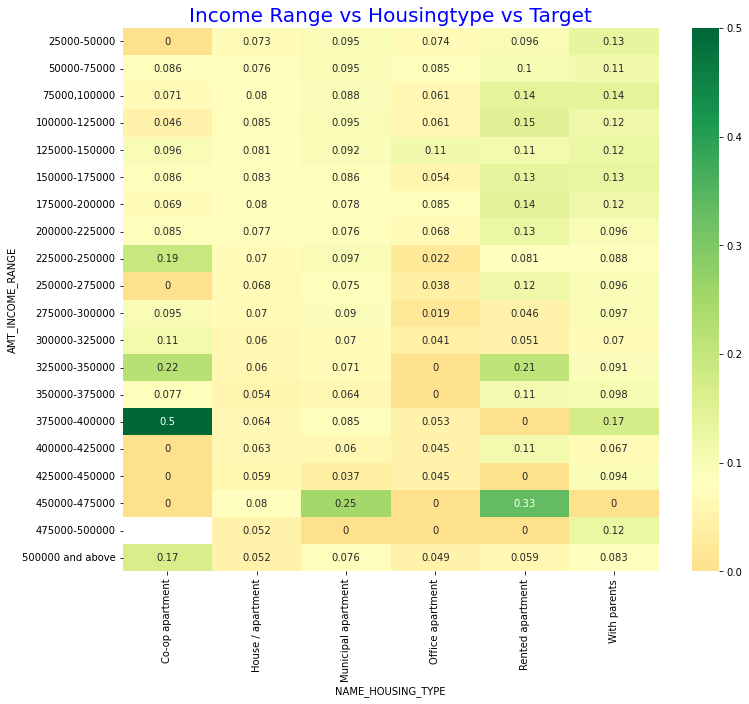

In [70]:
# creating heat map for  income ranges vs Housing type vs Target variables
res=pd.pivot_table(data=app_df,index='AMT_INCOME_RANGE',columns='NAME_HOUSING_TYPE',values='TARGET')
plt.figure(figsize=(12,10))
sns.heatmap(res,annot=True,cmap='RdYlGn',center=0.081)
plt.title("Income Range vs Housingtype vs Target", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

Clients living in rendted apartment and living with parents facing payment difficulty comapared to clients living in other category of housing types

In [71]:
# reading the previous application data
prev_app=pd.read_csv('previous_application.csv')
prev_app.shape

(1670214, 37)

In [72]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# calculate percentage of null values in columns previous application data
null_cols=(prev_app.isnull().sum()/len(prev_app)*100).sort_values(ascending=False)
null_cols

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [74]:
# dropping columns with more than 20% of null values in columns of previous application data
null_cols=null_cols[null_cols>20]
prev_app.drop(null_cols.index,axis='columns',inplace=True)

In [75]:
#dropping rows with null values in product combination
prev_app.drop(prev_app[prev_app['PRODUCT_COMBINATION'].isnull()==True].index,axis='rows',inplace=True)
#dropping rows with null values in credit amount
prev_app.drop(prev_app[prev_app['AMT_CREDIT'].isnull()==True].index,axis='rows',inplace=True)

In [76]:
prev_app.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922314
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [77]:
prev_app=prev_app.drop(prev_app[prev_app['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_app=prev_app.drop(prev_app[prev_app['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [78]:
# merging the application data set with previous application data set
df1=pd.merge(left=app_df,right=prev_app,how='inner',on='SK_ID_CURR',suffixes=(None,'_x'))

In [79]:
df1.shape

(59279, 50)

In [80]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'AGE_YEARS', 'JOB_YEARS',
       'AGE_GRP', 'JOB_EXP_GRP', 'AMT_CREDIT_RANGE', 'AMT_INCOME_RANGE',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE_x', 'AMT_APPLICATION', 'AMT_CREDIT_x',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFO

In [81]:
df1.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
EXT_SOURCE_2                   0
AGE_YEARS                      0
JOB_YEARS                      0
AGE_GRP                        0
JOB_EXP_GRP                    6
AMT_CREDIT_RANGE               0
AMT_INCOME_RANGE               0
SK_ID_PREV                     0
NAME_CONTRACT_TYPE_x           0
AMT_APPLIC

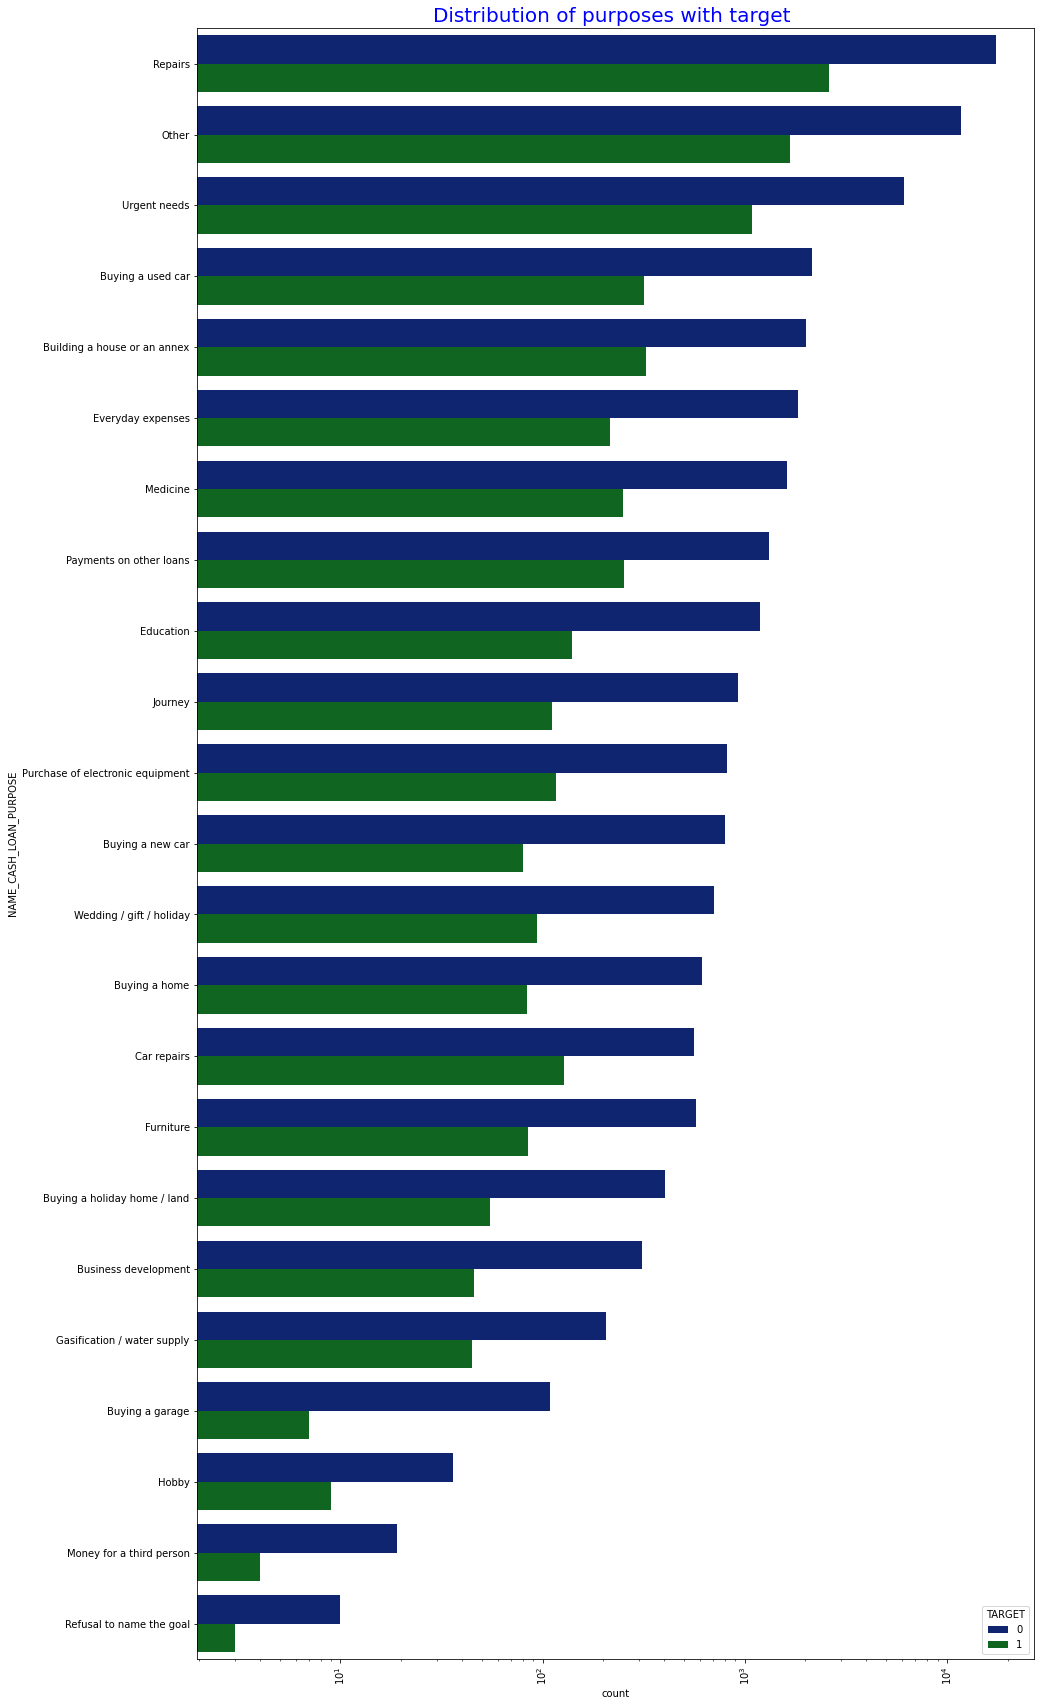

In [82]:
# plotting distributions for various loan purposes
plt.figure(figsize=(15,30))
sns.countplot(data = df1, y= 'NAME_CASH_LOAN_PURPOSE',order=df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

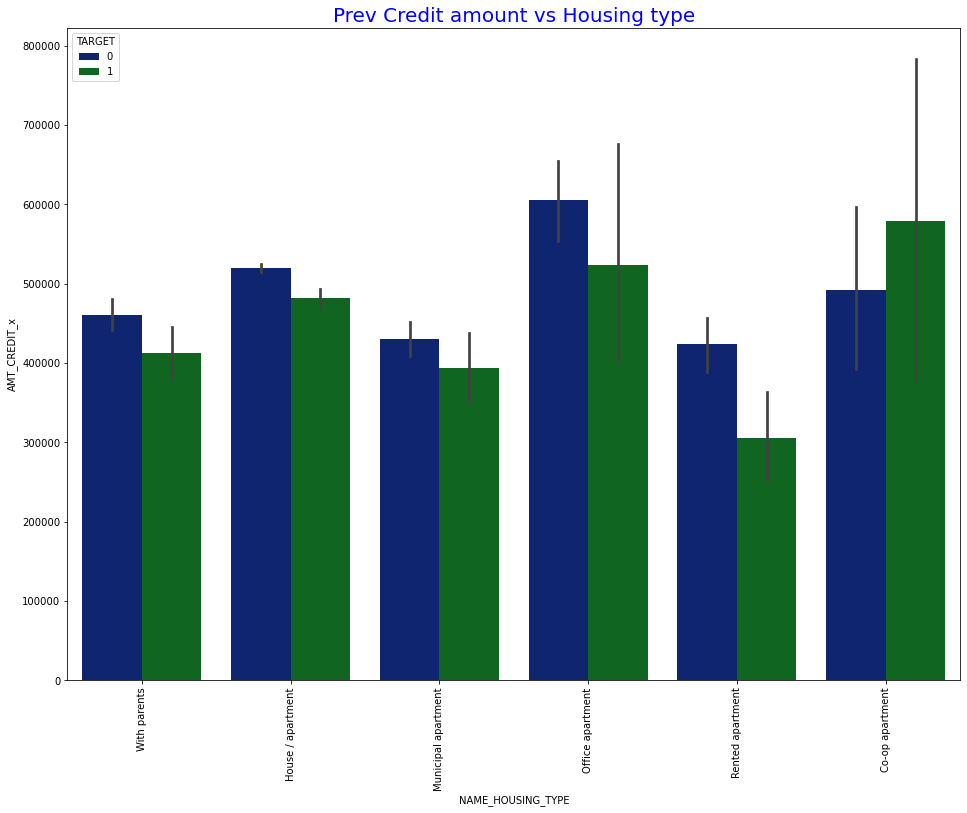

In [83]:
# Box plot for Previous Credit amount vs Housing type in logarithmic scale
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data=df1, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

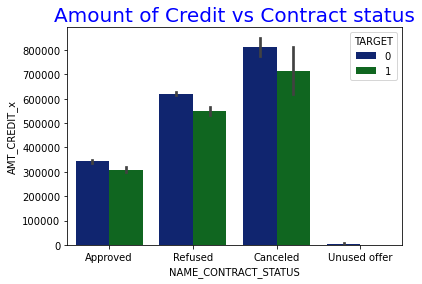

In [84]:
sns.barplot(data=df1, y='AMT_CREDIT_x',hue='TARGET',x='NAME_CONTRACT_STATUS')
plt.title('Amount of Credit vs Contract status',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

## Observations from the Analysis
    

1.Clients with lower secondary education as a category are more likely to miss their payments compared to other categories.
  Within the lower secondary education group,clients in age groups of 20-30 and 30-40 are more prone to payment difficulties
    
2.Clients with job experience of less than 5 years are more likely to face payment difficulties compared to clients with more than 5 years experience

3.Unemployed clients with lower income ranges upto 150000 are facing payment diffculties. Client with maternity leave category also facing payment difficulty.

4.Unemployed clients in higher credit ranges of 300000 to 800000 as a category are facing payemnt difficulties.
  Working clients in credit ranges of 100000 to 800000 are likely to payment difficulties.
  Businessman and student category clients are not facing any payment difficulties.

5.clients who own real estate property are most prone to payment difficulties compared to who doesnt own a real estate property.

6.Median Credit amount is higher for clients with acadamic degree who are facing payment difficulties and there are more clients above median credit amount in this category facing payment difficulties

7.Among the clients facing payment difficulties,Clients with lower secondary education as a group tend to have lower than median credit ratings compared to all other categories by education type

8.Clients living in rendted apartment and living with parents facing payment difficulty comapared to clients living in other category of housing types.

9.Businessman and student category of income type have less payment difficulties.

10.In all Credit ranges , more female clients are facing payment difficultie compared to male clients.